In the context of data science (DS), I can provide you with code and ask you to analyze or interpret it. For example, I might share a Keras-based neural network description and ask you to visualize its architecture or identify whether the task is classification or regression. Additionally, I may present incomplete code where you’ll need to fill in the gaps.

If any documentation is required, it will be provided as part of the assignment. You should be familiar with common Keras functions such as fit(), predict(), compile(), and add(), as well as key components like Model, Dense, Conv2D, Pooling, and Flatten.

## Set up an external environment first

```bash
python3 --version
    Python 3.11.2
```

```bash
python3 -m venv .venv
```

```bash 
source .venv/bin/activate
```

```bash
pip install scikit-learn
```

In VSCode select -> jupyter kernel -> select the python enviroment created

![image.png](./image.png)

# 1. Introduction

**Load the dataset**

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Useful data**

In [9]:
print("there are", len(y), "data. ")
print("Type of data: ", type(X[0][0]))
print("Dimension of data ", X.shape[1])
print("Type of label: ", type(y[0]))

there are 150 data. 
Type of data:  <class 'numpy.float64'>
Dimension of data  4
Type of label:  <class 'numpy.int64'>


**Load the dataset MNIST**

Install the package tensorflow
```bash
pip install tensorflow
```

In [10]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2024-11-14 09:47:06.829104: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 09:47:06.901049: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 09:47:06.949724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731574027.000851   11835 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731574027.016492   11835 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 09:47:07.133732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [11]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Plot a data**

Install the package matplotlib
```bash
pip install matplotlib
```

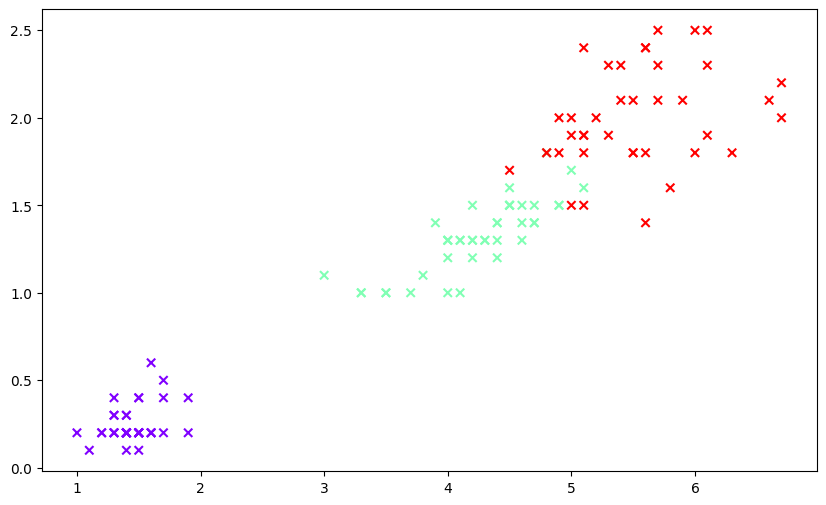

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming y_train contains more than two classes
num_classes = len(np.unique(y_train))
colors = cm.rainbow(np.linspace(0, 1, num_classes))

col = [colors[c] for c in y_train]

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 2], X_train[:, 3], c=col, marker="x")
plt.show()

**Confusion Matrix**

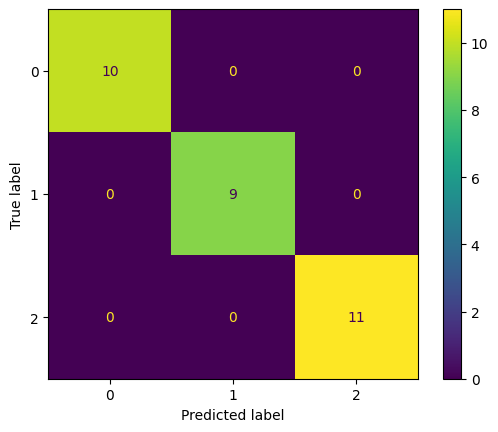

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
ypred = clf.predict(X_test)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()


**Score**

In [14]:
from sklearn.metrics import accuracy_score

print("train accuracy of a classification")
accuracy = accuracy_score(y_test, ypred)
print(f"Accuracy: {accuracy:.2f}")

train accuracy of a classification
Accuracy: 1.00


# 2. Decision trees


**Function predict:**
Once the model is trained, we can use predict() to predict an output value, on the basis of input values. 
We call it from an existing instance of a machine learning model that’s already been trained

- model_instance.predict(x_text);
- Model_instance: (Linear regression, SVM, decision trees ,...)
- Predict: the predict method
- X_test: the features of the test data (input needs to be 2D numpy format)

**Train data**


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

**Basic tree algorithm in python and plotA**


Accuracy of a test classification 0.9333333333333333


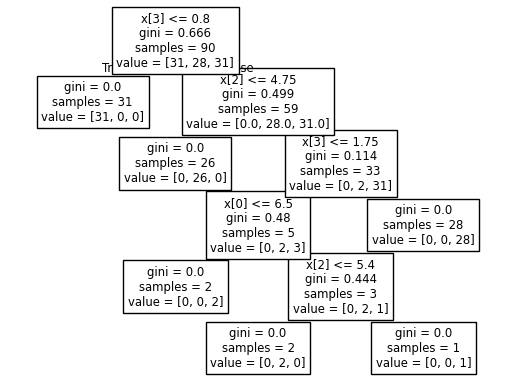

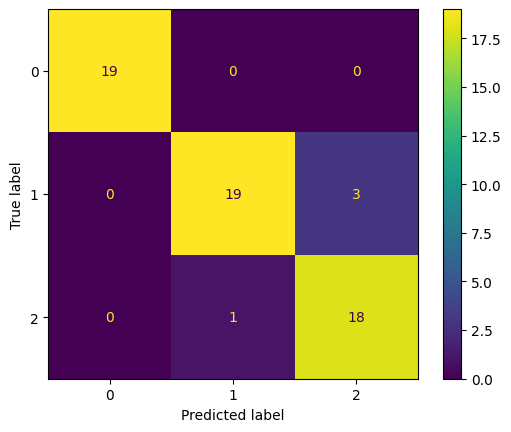

In [16]:
from sklearn import tree

myTree = tree.DecisionTreeClassifier()
myTree.fit(X_train,y_train)
ypred = myTree.predict(X_test)
tree.plot_tree(myTree)

print("Accuracy of a test classification", accuracy_score(y_test,ypred))


ConfusionMatrixDisplay.from_predictions(y_test,ypred)

# 3. Dimension Reduction

## Fit method
“Fit” a machine learning model in Python.
The scikit learn ‘fit’ method is one of those tools. The ‘fit’ method trains the algorithm on the training data, after the model is initialised. Uses the training data X as input to train the machine learning model .


**PCA:**
n_components : Number of components to keep, number of dimensions.
If we set it to 2: we transform to 2 dimensions.


In [17]:
from sklearn.decomposition import PCA
from sklearn import datasets

#X dimension: (1797, 64) is 64
X,y = datasets.load_digits(return_X_y=True)
pca = PCA(n_components = 29)

# pca.fit(X)

# X_pca = pca.transform(X)

X_pca = pca.fit_transform(X)


**tSNE**

In [18]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

plot the sesults

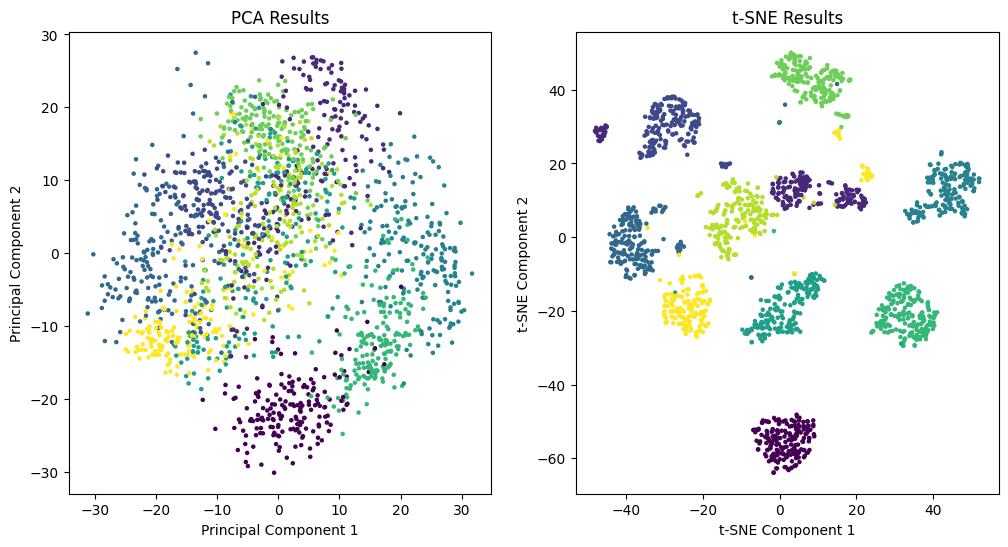

In [19]:
# Plot PCA results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=5)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()